In [2]:
import pandas as pd
import matplotlib.pyplot as mpl

data = pd.read_csv('flavors_of_cacao.csv')
data.describe()
#data.shape
#data.info()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [53]:
data.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [3]:
# %% Rename columns (to eliminate special characters for easier processing)
data.columns = ['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']
data.columns.values

array(['Company (Maker-if known)', 'Specific Bean Origin or Bar Name',
       'REF', 'Review Date', 'Cocoa Percent', 'Company Location',
       'Rating', 'Bean Type', 'Broad Bean Origin'], dtype=object)

In [48]:
# %% remove % from Cocoa Percentage and convert to numeric data
# (runs first time)
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '') 
data['Cocoa Percent'] = pd.to_numeric(data['Cocoa Percent']) 
data.describe()

,REF,Review Date,Cocoa Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


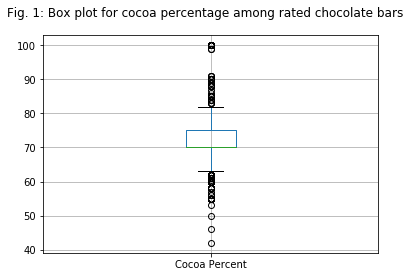

Quartiles:
      Cocoa Percent
0.25           70.0
0.50           70.0
0.75           75.0


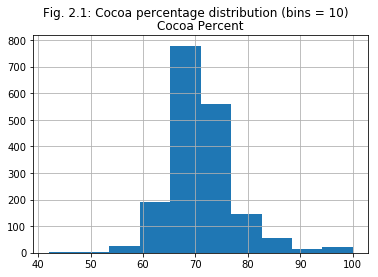

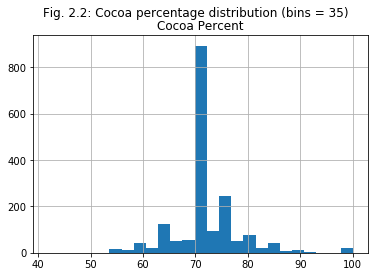

,Cocoa Percent
count,1795.000000
mean,71.698329
std,6.323118
min,42.000000
25%,70.000000
50%,70.000000
75%,75.000000
max,100.000000


In [28]:
# %% display Cocoa Percentage Variation
cocoaPercentages = pd.DataFrame(data, columns = ['Cocoa Percent'])
cocoaPercentages.boxplot()
mpl.suptitle("Fig. 1: Box plot for cocoa percentage among rated chocolate bars")
mpl.show()

print('Quartiles:')
print(cocoaPercentages.quantile([.25, .5, .75]))

cocoaPercentages.hist(bins = 10)
mpl.suptitle("Fig. 2.1: Cocoa percentage distribution (bins = 10)")
mpl.show()

cocoaPercentages.hist(bins = 25)
mpl.suptitle("Fig. 2.2: Cocoa percentage distribution (bins = 35)")
mpl.show()

cocoaPercentages.describe()

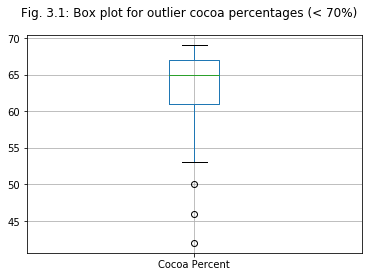

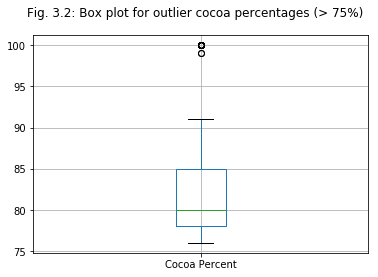

Lighter Cocoa Quartiles:
         REF  Review Date  Cocoa Percent  Rating
0.25   414.0       2009.0           61.0    3.00
0.50   797.0       2012.0           65.0    3.25
0.75  1286.0       2014.0           67.0    3.50
Darker Cocoa Quartiles:
         REF  Review Date  Cocoa Percent  Rating
0.25   615.0       2010.0           78.0    2.75
0.50  1129.0       2013.0           80.0    3.00
0.75  1506.0       2015.0           85.0    3.25


In [46]:
# %% exploring outliers in Cocoa Percent (boxplots)
lighterCocoaPercent = data[data['Cocoa Percent'] < 70]
darkerCocoaPercent = data[data['Cocoa Percent'] > 75]

lighterCocoaPercent.boxplot(column='Cocoa Percent')
mpl.suptitle("Fig. 3.1: Box plot for outlier cocoa percentages (< 70%)")
mpl.show()

darkerCocoaPercent.boxplot(column='Cocoa Percent')
mpl.suptitle("Fig. 3.2: Box plot for outlier cocoa percentages (> 75%)")
mpl.show()

print('Lighter Cocoa Quartiles:')
print(lighterCocoaPercent.quantile([.25, .5, .75]))

print('Darker Cocoa Quartiles:')
print(darkerCocoaPercent.quantile([.25, .5, .75]))


,REF,Review Date,Cocoa Percent,Rating
count,328.000000,328.000000,328.000000,328.000000
mean,861.631098,2011.411585,63.766768,3.188262
std,543.365704,2.987966,3.958272,0.458315
min,15.000000,2006.000000,42.000000,1.500000
25%,414.000000,2009.000000,61.000000,3.000000
50%,797.000000,2012.000000,65.000000,3.250000
75%,1286.000000,2014.000000,67.000000,3.500000
max,1900.000000,2016.000000,69.000000,4.000000


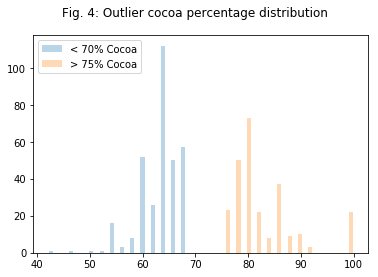

In [54]:
# %% exploring outliers in Cocoa Percent (histograms + describe)
mpl.hist([lighterCocoaPercent['Cocoa Percent'], darkerCocoaPercent['Cocoa Percent']], 
         bins = 30, alpha = 0.3, label = ['< 70% Cocoa', '> 75% Cocoa'])
mpl.suptitle("Fig. 4: Outlier cocoa percentage distribution")
mpl.legend(loc = 'upper left')

lighterCocoaPercent.describe()

In [51]:
darkerCocoaPercent.describe()

,REF,Review Date,Cocoa Percent,Rating
count,257.000000,257.000000,257.000000,257.000000
mean,1071.311284,2012.556420,82.595331,2.962062
std,546.392105,2.888171,6.471064,0.515644
min,15.000000,2006.000000,76.000000,1.000000
25%,615.000000,2010.000000,78.000000,2.750000
50%,1129.000000,2013.000000,80.000000,3.000000
75%,1506.000000,2015.000000,85.000000,3.250000
max,1940.000000,2017.000000,100.000000,4.000000


In [5]:
data.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,,Peru


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C332C88>,
      dtype=object)

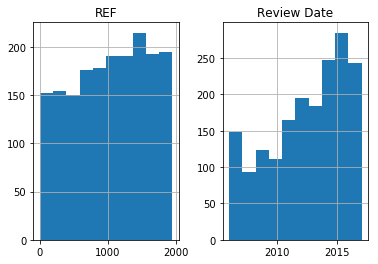

In [149]:
# %% visualizing review years and Review Date (test-retest reliability)
reviewYears = pd.DataFrame(data, columns = ['Review Date', 'REF'])
# reviewYears.boxplot()
reviewYears.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002C2C7688>]],
      dtype=object)

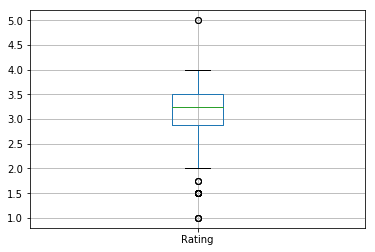

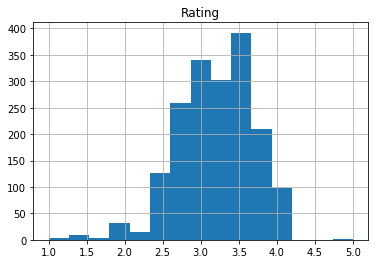

In [150]:
# %% visualizing ratings
ratings = pd.DataFrame(data, columns = ['Rating'])
ratings.boxplot()
ratings.hist(bins = 15)

In [102]:
# %% get unique Company names, and company locations
companies = data['Company (Maker-if known)'].unique()
print('Number of companies ', len(companies))

countries = data['Company Location'].unique()
print('Number of locations ', len(countries))

('Number of companies ', 416)
('Number of locations ', 60)


In [67]:
# %% get number of chocolates reviewed per company
data['Company (Maker-if known)'].value_counts()

Soma                                      47
Bonnat                                    27
Fresco                                    26
Pralus                                    25
A. Morin                                  23
Guittard                                  22
Domori                                    22
Arete                                     22
Valrhona                                  21
Hotel Chocolat (Coppeneur)                19
Coppeneur                                 18
Mast Brothers                             18
Zotter                                    17
Scharffen Berger                          17
Dandelion                                 16
Rogue                                     16
Artisan du Chocolat                       16
Smooth Chocolator, The                    16
Szanto Tibor                              15
Tejas                                     14
Bittersweet Origins                       14
Pierre Marcolini                          14
Castronovo

In [86]:
# %% save chocolate data for top 2 companies in terms of rating frequency 
filterCompanies = ['Soma', 'Bonnat']
soma_bonnatChocolates = data[data['Company (Maker-if known)'].isin(filterCompanies)]

# confirming selection
soma_bonnatChocolates['Company (Maker-if known)'].unique()

array(['Bonnat', 'Soma'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000027C97A48>,
      dtype=object)

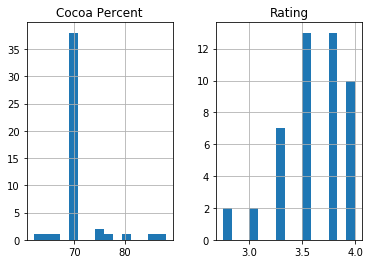

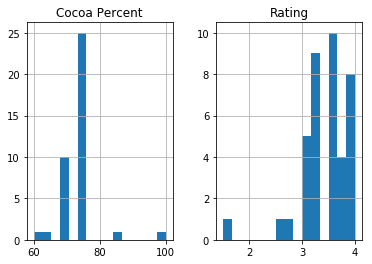

In [95]:
# %% get cocoa percent and ratings for selected chocolates 
FILTER_BINS = 15

somaChoc_cocoaRating = pd.DataFrame(data[data['Company (Maker-if known)'].str.contains(filterCompanies[0])], columns = ['Cocoa Percent', 'Rating'])
somaChoc_cocoaRating.hist(bins = FILTER_BINS)

bonnatChoc_cocoaRating = pd.DataFrame(data[data['Company (Maker-if known)'].str.contains(filterCompanies[1])], columns = ['Cocoa Percent', 'Rating'])
bonnatChoc_cocoaRating.hist(bins = FILTER_BINS)

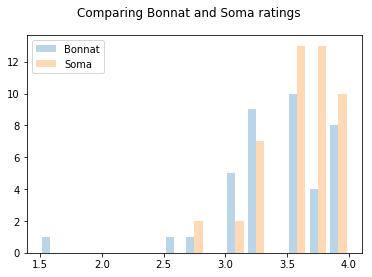

In [122]:
# %% get cocoa percent and ratings for selected chocolates 
# ref https://stackoverflow.com/a/61518708/1446598

mpl.hist([bonnatChoc_cocoaRating['Rating'], somaChoc_cocoaRating['Rating']], 
         bins = FILTER_BINS, alpha = 0.3, label = ['Bonnat', 'Soma'])
mpl.suptitle("Comparing Bonnat and Soma ratings")
mpl.legend(loc = 'upper left')
mpl.show() #hide plot metadata

Text(0.5,0.98,'Correlation between Ratings and Cocoa Percent')

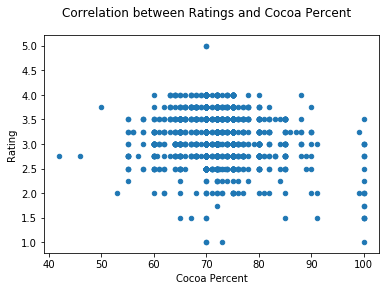

In [100]:
# %% Exploring correleation between cocoa percent and rating
data.plot.scatter('Cocoa Percent', 'Rating')
mpl.suptitle("Correlation between Ratings and Cocoa Percent")

# Most Cocoa Percentage values tend to be in the 60-80% range, lower values have always led to middle ratings (2.5-3)